# **In Four Minutes or Less: Exploring Factors Influencing Speed Dating Matches by Olivia Jones and Phuong Nguyen**


## Introduction

In today’s busy world, finding and dating a romantic partner seems more time-consuming than ever. As a result, many individuals have turned to speed dating as a practical solution that allows them to meet and interact with numerous potential partners in a brief period. This approach not only offers a streamlined avenue for romantic connection but also raises intriguing questions about human social behavior and the dynamics of attraction.

Our project leverages a dataset on speed dating, meticulously compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their study, "Gender Differences in Mate Selection: Evidence from a Speed Dating Experiment." This data was collected from experimental speed dating events held between 2002 and 2004, where participants engaged in short meetings and rated each other on attributes such as Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. Additionally, participants completed detailed questionnaires regarding their demographics, dating habits, and personal values before and after the events.

## Objective

Our primary objective is to analyze the speed dating dataset to uncover insights into how people select their partners during these events. We aim to identify patterns and trends within the data and analyze the questionnaire responses to discern the factors influencing participant selections. Our goal is to produce a comprehensive project that sheds light on the dynamics of dating selection in speed dating scenarios, providing a deeper understanding of the complexities involved in making quick decisions about potential romantic partners.

## Data Description

The Speed Dating dataset we are analyzing was originally assembled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their study titled “Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.” It encompasses data collected from experimental speed dating events held between 2002 and 2004, involving over 500 participants ranging in age from 18 to 55. During these events, participants engaged in a series of four-minute "first dates" with members of the opposite sex. After each mini-date, participants rated their date on six key attributes:

- **Attractiveness (attr_o)**
- **Sincerity (sinc_o)**
- **Intelligence (intel_o)**
- **Fun (fun_o)**
- **Ambition (amb_o)**
- **Shared Interests (shar_o)**

Additionally, participants were asked if they expected to match with their partner, providing a unique insight into immediate dating preferences and expectations. The dataset also contains extensive questionnaire data about the participants, including demographics, dating habits, self-perception on the six mentioned attributes, beliefs on what others find valuable in a mate, and lifestyle information.

This dataset records the interactions from 21 different speed dating events, where participants typically met between 10 to 20 potential partners per event. Each row in the dataset corresponds to a unique event 'instance' where a participant (identified by 'iid') had a four-minute date with another participant (identified by 'pid').

It's crucial to note the age of the data. Being from 2002–2004, the cultural context and dating preferences might significantly differ from current trends, particularly as these values might have evolved over the past nearly two decades. Also, considering most participants were under thirty, the findings are more applicable to younger individuals and might not be fully representative of older segments of the dating population.

The dataset is available for download from Kaggle: [Speed Dating Data](https://www.kaggle.com/annavictoria/speed-dating-experiment/downloads/Speed%20Dating%20Data.csv.zip).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1uXUNl6HGNa24OS6SuNkr4yT9DvLn5ZtG'

# Load the dataset with a different encoding
df = pd.read_csv(url, encoding='ISO-8859-1')

# Display the first few rows of the dataframe
df.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

To clean the data, we first examined the Speed Dating Data Key to understand the methodology of the data collection. We then identified the variables we wanted to examine, removed redundant columns, and deleted columns with sparse data. We also normalized the attribute rankings by converting the scores out of 10 to be out of 100.

In [ ]:
#Clean data
# Remove rows where all cells in that row are NaN
df = df.dropna(how='all')
df.fillna(0, inplace=True) #replace NaN value with 0
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,0.0,4,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0,1,1,1,10,7,0.0,3,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0,1,1,1,10,7,0.0,10,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,0,1,1,1,10,7,0.0,5,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
4,1,1.0,0,1,1,1,10,7,0.0,7,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0


# **Demographics**

In our exploration of speed dating dynamics, understanding the demographics of our participants is crucial. The dataset includes extensive demographic information, such as age, gender, ethnicity, educational background, and career fields, from the participants. This data allows us to examine how these demographic factors might influence dating preferences and interaction outcomes. For this we will look at the ages and races of the participants.

## Age

We will explore the dataset by analyzing the age dynamics among participants. Our focus will be on the distribution and average age for men and women. This will help us understand the demographics and potential age-related preferences in dating behavior. By comparing the age distributions and mean ages between genders, we can identify prevalent age groups and how age might influence match outcomes. We will use a graph to provide a detailed breakdown of these age-related metrics and highlight any significant differences or similarities between male and female participants.

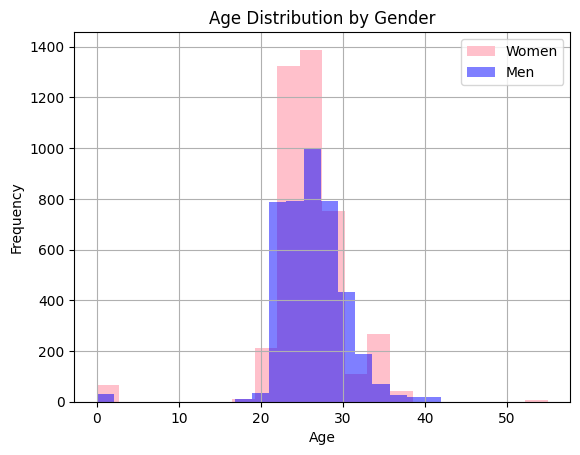

The mean of ages in Men is 26.42
The mean of ages in Women is 25.7


In [ ]:
# Separate ages by gender
ages_women = df[df['gender'] == 0]['age']
ages_men = df[df['gender'] == 1]['age']

plt.hist(ages_women, alpha=1, label='Women', bins=20, color='pink')
plt.hist(ages_men, alpha=0.5, label='Men', bins=20, color='blue')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Calculate the mean and round to two decimal places
mean_age_men = round(ages_men.mean(), 2)
mean_age_women = round(ages_women.mean(), 2)

print("The mean of ages in Men is", mean_age_men)
print("The mean of ages in Women is", mean_age_women)


From the age distribution chart provided, we can observe several key insights about the dataset of participants:

1. **Age Concentration**: The majority of both men and women participants fall within the 20 to 35 age range, with a peak frequency around the late 20s. This suggests that the dataset primarily comprises young adults, which is a demographic typically active in social and dating scenarios.

2. **Gender Differences in Age Distribution**: The age distribution for men shows a slightly broader spread into the mid-30s, whereas the distribution for women tends to taper off more sharply after the peak in the late 20s. This indicates a slightly higher representation of men in their early to mid-30s compared to women.

3. **Mean Ages**: The mean age for men in this dataset is 26.42 years, while for women, it is slightly lower at 25.7 years. The close proximity of these averages further supports the idea that the dataset targets a similar demographic cohort for both genders, though men are slightly older on average.

4. **Analysis of Outliers and Tail Behavior**: There are fewer participants of both genders in the 0-20 and 40-50 age ranges, showing a strong focus on the central age group. The presence of participants under 20 and over 40 is minimal, which may reflect the targeted demographic or potentially the eligibility criteria for the event.

These observations help in understanding the demographic makeup of the participants, suggesting that the event or dataset appeals mainly to a younger adult audience.

## Race

We will examine the racial composition of the study participants to identify any predominant demographics and understand the diversity of the sample. Analyzing race distribution is crucial for assessing representation and diversity, cultural dynamics, and equity and inclusion. We will use graphical representations to clarify the racial makeup of the sample and identify any skewness towards certain groups.


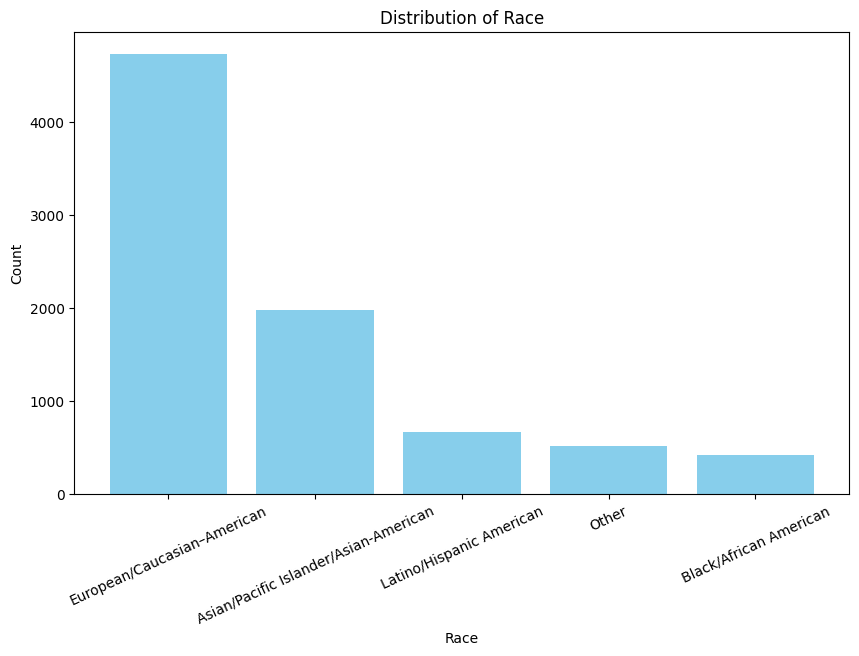

In [ ]:
race_mapping = {
    1: 'Black/African American',
    2: 'European/Caucasian–American',
    3: 'Latino/Hispanic American',
    4: 'Asian/Pacific Islander/Asian-American',
    5: 'Native American',
    6: 'Other',
}

df['race'] = df['race'].map(race_mapping)

# Calculate the value counts for each race
race_counts = df['race'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(race_counts.index, race_counts.values, color='skyblue')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=25)
plt.show()



The bar chart depicting the distribution of race within the dataset reveals a significant predominance of European/Caucasian-American participants, followed by Asian/Pacific Islander/Asian-American individuals. The relatively smaller counts of Latino/Hispanic American, Other, and Black/African American participants suggest a lesser representation of these groups. This racial composition highlights the need to consider diversity and inclusion strategies when analyzing the dataset and potentially when designing future studies or events to ensure a more balanced representation across different racial groups.

# **Analysis**

## Match vs Same Race
To better understand the dynamics of dating preferences and their outcomes, we've focused on the role of race in influencing match success rates. This analysis aims to discern whether individuals tend to prefer partners of the same race, and if so, how this preference impacts the likelihood of a match. By examining the data on race and match outcomes, we can gauge the extent to which racial similarities contribute to dating decisions. The following graph illustrates the percentage of matches that involve partners of the same race, providing a clear visual representation of these tendencies within the dataset.


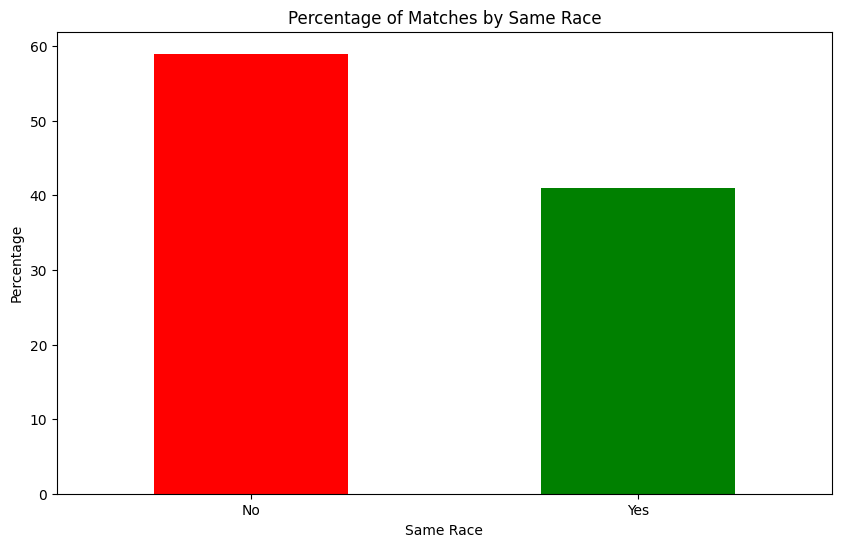

Percentage of matches for same race: 41.01%
Percentage of matches for not same race: 58.99%


In [ ]:
df['samerace'] = df['samerace'].replace({0: "No", 1: "Yes"})

matches_df = df[df['match'] == 1]

# Group by 'samerace' and count occurrences, then reset index
grouped_df = matches_df.groupby('samerace').size().reset_index(name='count')

# Calculate the total number of matches (now all are match = 1)
total_matches = grouped_df['count'].sum()

# Calculate percentage of each samerace category
grouped_df['percentage'] = grouped_df['count'] / total_matches * 100

# Plotting using the grouped DataFrame
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df.plot(kind='bar', x='samerace', y='percentage', ax=ax, color=['red','green'], legend=False)

ax.set_title('Percentage of Matches by Same Race')
ax.set_xlabel('Same Race')
ax.set_ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

print(f"Percentage of matches for same race: {grouped_df.loc[grouped_df['samerace'] == 'Yes', 'percentage'].values[0]:.2f}%")
print(f"Percentage of matches for not same race: {grouped_df.loc[grouped_df['samerace'] == 'No', 'percentage'].values[0]:.2f}%")


The graph shows that 58.99% of matches occur between individuals of different races, while 41.01% are between individuals of the same race, suggesting that race is not an important factor in choosing a partner.

## Goal of Dating vs. Gender

Analyzing dating goals by gender can give us insights into how people interact. Comparing these goals can help us understand how each gender approaches relationships and dating.

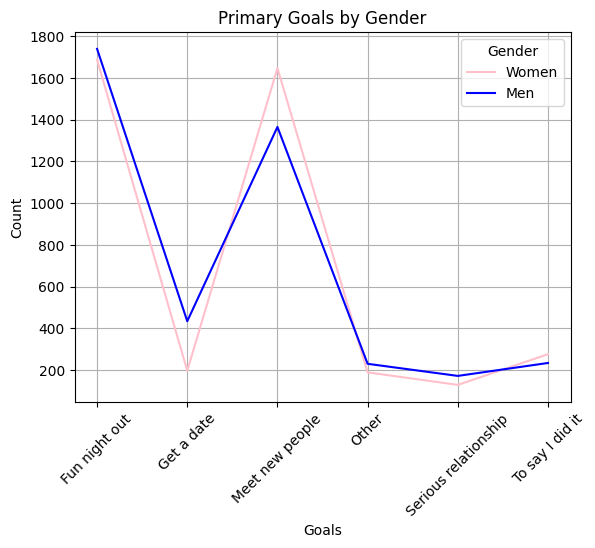

In [ ]:
goal_mapping = {
    1: 'Fun night out',
    2: 'Meet new people',
    3: 'Get a date',
    4: 'Serious relationship',
    5: 'To say I did it',
    6: 'Other'
}
df['goal_label'] = df['goal'].map(goal_mapping)


# Aggregate the data
goal_counts_women = df[df['gender'] == 0]['goal_label'].value_counts().sort_index()
goal_counts_men = df[df['gender'] == 1]['goal_label'].value_counts().sort_index()


# Plotting both men and women on the same graph
goal_counts_women.plot(kind='line', label='Women', color='pink')
goal_counts_men.plot(kind='line', label='Men', color='blue')

plt.title('Primary Goals by Gender')
plt.xlabel('Goals')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()



The "Primary Goals by Gender" graph shows that both men and women are interested in meeting new people. Men are more inclined towards getting a date, while women prefer serious relationships. "To say I did it" is the least popular goal for both genders, indicating genuine social or romantic interests.

## How Men and Women Ranked Attributes Before the event

Before the speed dating event, participants were asked to quantify their preferences for certain attributes in potential dates, providing a snapshot of their initial dating priorities. Participants had 100 points to allocate across the attributes, directing more points towards the traits they found more significant. This method of evaluation helps illustrate the relative value participants place on these attributes before any interaction at the event, setting a baseline for how their perceptions might change post-experience.

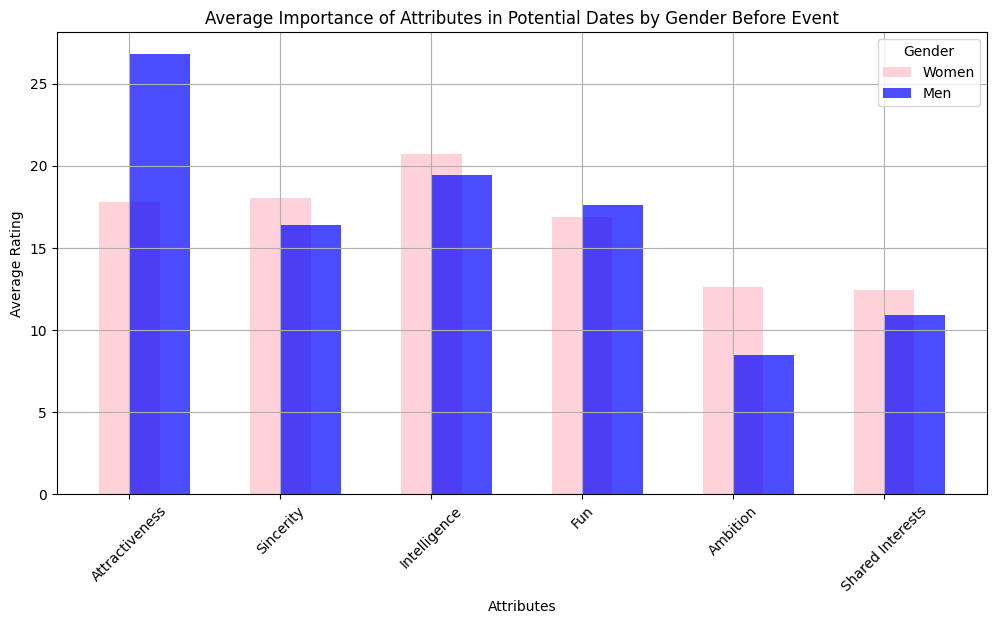

Women's average ranking for attributes:
  attr1_1: 17.80
  sinc1_1: 18.05
  intel1_1: 20.71
  fun1_1: 16.91
  amb1_1: 12.65
  shar1_1: 12.46

Men's average ranking for attributes:
  attr1_1: 26.79
  sinc1_1: 16.42
  intel1_1: 19.44
  fun1_1: 17.64
  amb1_1: 8.47
  shar1_1: 10.89


In [ ]:
# Define attribute labels
attributes = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
labels = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition', 'Shared Interests']

# Calculate average ratings for each attribute by gender
avg_women = df[df['gender'] == 0][attributes].mean()
avg_men = df[df['gender'] == 1][attributes].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))

# Plot for women
plt.bar(labels, avg_women, color='pink', alpha=0.7, label='Women',width=0.4, align='center')

# Plot for men, slightly offset to the right for clarity
plt.bar(labels, avg_men, color='blue', alpha=0.7, label='Men', width=0.4, align='edge')

plt.title('Average Importance of Attributes in Potential Dates by Gender Before Event')
plt.xlabel('Attributes')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

# Print the averages for each attribute by gender, each on a new line
print("Women's average ranking for attributes:")
for attribute, value in avg_women.items():
    print(f"  {attribute}: {value:.2f}")

print("\nMen's average ranking for attributes:")
for attribute, value in avg_men.items():
    print(f"  {attribute}: {value:.2f}")

From the graph, it is evident that men placed highest value on Attractiveness and Intelligence. Women, on the other hand, gave greater importance to Sincerity and Intelligence. Fun also scored relatively high across both genders but was valued more by men. Interestingly, Ambition received the lowest importance from both genders, though men rated it slightly higher than women. Shared Interests ranked higher among women than men, indicating a gender difference in the value placed on common hobbies and interests in potential relationships.

## How Men and Women Ranked Attributes After the event

After the speed dating event, participants were asked to reflect on their yes/no decisions and rate 1-10 (1=not at all important, 10=extremely important):  across six key attributes to indicate their importance in these decisions. This exercise helps reveal which qualities participants truly valued when choosing potential matches. By distributing points based on their actual influence on decision-making, participants provided direct insights into the traits that matter most in their initial romantic engagements. This point distribution method emphasizes the trade-offs participants are willing to make, offering a clear picture of priorities when all attributes cannot be equally satisfied.

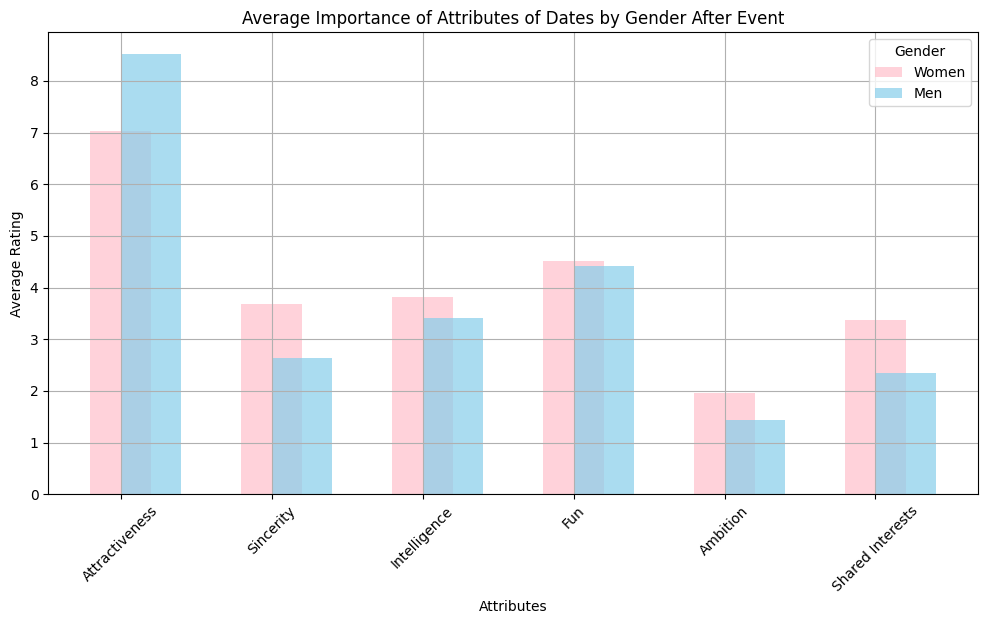

Women's average ranking for attributes:
  attr7_2: 7.03
  sinc7_2: 3.68
  intel7_2: 3.82
  fun7_2: 4.52
  amb7_2: 1.96
  shar7_2: 3.38

Men's average ranking for attributes:
  attr7_2: 8.51
  sinc7_2: 2.64
  intel7_2: 3.42
  fun7_2: 4.41
  amb7_2: 1.44
  shar7_2: 2.35


In [ ]:
# Define attribute labels
attributes2 = ['attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2']
labels = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition', 'Shared Interests']

# Calculate average ratings for each attribute by gender
avg_women = df[df['gender'] == 0][attributes2].mean()
avg_men = df[df['gender'] == 1][attributes2].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))

# Plot for women
plt.bar(labels, avg_women, color='pink', alpha=0.7, label='Women',width=0.4, align='center')

# Plot for men, slightly offset to the right for clarity
plt.bar(labels, avg_men, color='skyblue', alpha=0.7, label='Men', width=0.4, align='edge')

plt.title('Average Importance of Attributes of Dates by Gender After Event')
plt.xlabel('Attributes')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

print("Women's average ranking for attributes:")
for attribute, value in avg_women.items():
    print(f"  {attribute}: {value:.2f}")

print("\nMen's average ranking for attributes:")
for attribute, value in avg_men.items():
    print(f"  {attribute}: {value:.2f}")

This post-event perspective provides a comparative insight into how experiences during the event might have influenced participants' values and preferences.

1. **Attractiveness**: Still the highest-rated attribute overall, especially for men, indicating its continued importance in initial impressions. However, its relative importance that for women this became the highest ranking attribute After the event compared to Before. Suggesting a possible shift towards valuing other qualities less after interacting with potential partners.

2. **Sincerity and Intelligence**: These attributes have seen a noticeable decrease in their ratings for women, indicating a decrease appreciation for genuine and intelligent interactions post-event. For men, sincerity holds steady, but intelligence has seen a slight decline, perhaps due to a refocusing on other traits.

3. **Fun**: Both genders rated 'Fun' lower after the event than they did beforehand, which could suggest that while enjoyable, participants may have found that having fun was less indicative of potential long-term compatibility than they initially thought.

4. **Ambition and Shared Interests**: These attributes received mixed reactions. Women rated 'Ambition' lower after the event, possibly reflecting a reassessment of what traits are most likely to contribute to a successful relationship. 'Shared Interests' saw an decrease for women and men, suggesting that shared activities and hobbies became less crucial for women in finding a compatible partner.

## Influence of Attributes on Match Outcomes in Dating

In [ ]:
# Filtering columns that seem to be ratings given by the partner, typically ending with '_o'
rating_columns = [col for col in df.columns if col.endswith('_o')]

# Calculate the mean ratings for 'match == 1' and 'match == 0'
mean_ratings_match = df[df['match'] == 1][rating_columns].mean()
mean_ratings_no_match = df[df['match'] == 0][rating_columns].mean()

# Creating a summary DataFrame
ratings_comparison = pd.DataFrame({
    'Average Rating (Match)': mean_ratings_match,
    'Average Rating (No Match)': mean_ratings_no_match
})

ratings_comparison

,Average Rating (Match),Average Rating (No Match)
age_o,25.736957,26.097028
race_o,2.692754,2.740497
dec_o,1.000000,0.305087
attr_o,7.303986,5.783281
sinc_o,7.752899,6.767076
intel_o,7.892754,6.943841
fun_o,7.515942,5.851386
amb_o,6.918478,6.051443
shar_o,6.166304,4.496713
like_o,7.360507,5.673578


The analysis of the dating data reveals that higher attribute ratings by partners consistently correlate with higher probabilities of matches, showing the importance of these attributes in the decision-making process of participants.
1. **Attractiveness and Fun**: The most significant variance between matches and no matches are observed in ratings for attractiveness and fun. These results suggest that participants who are perceived as more attractive and fun are more likely to form a match. Attractiveness, with a notable difference of approximately 1.36 points between matches and no matches, appears to be a critical factor, potentially due to its immediate impact on first impressions. Similarly, the ability to provide an enjoyable experience, as indicated by fun ratings, also significantly affects the likelihood of a match
2. **Intellect and Sincerity**: Ratings for intelligence and sincerity also show meaningful differences, with higher ratings correlating with successful matches. This indicates that beyond surface-level traits, core personal values and cognitive qualities play vital roles in determining compatibility and attraction in speed dating scenarios.
3. **Ambition and Shared Interests**: Ambition and shared interests also contribute positively to match outcomes, although with slightly lesser impact compared to attractiveness and fun. These attributes likely relate to the participants' perceptions of long-term compatibility and shared life goals, which are crucial for more serious considerations beyond initial encounters.
4. **Likeness and Perceived Match Probability**: Interestingly, how much one likes another person and their perceived probability of a match are strongly indicative of actual match outcomes. This reflects a psychological aspect of self-fulfilling prophecies in dating, where positive perceptions and expectations may enhance mutual attraction and consent to match.


# **Conclusion**

Through the analysis of the speed dating dataset collected from Columbia University graduate and professional students, our project, "In Four Minutes or Less: Exploring Factors Influencing Speed Dating Matches," has revealed critical insights into the dynamics of mate selection during speed dating events. This investigation was guided by our overarching aim to decipher the complex web of dating and relationship patterns in the context of modern dating environments.

**Key Findings**:

1. **Attribute Importance Across Genders**:
Before and after the dating event, attributes such as attractiveness, sincerity, fun, intelligence, ambition, and shared interests were evaluated for their impact on dating decisions. Our analysis confirmed that while attractiveness consistently played a significant role, other attributes like fun and sincerity also significantly influenced participants' choices during the event.
2. **Match Success by Attribute Ratings**:
Comparing attribute ratings between matches and no matches showed that participants who rated each other higher across most attributes were more likely to form a match. This highlights the importance of a favorable first impression based on a variety of characteristics, not just physical attractiveness.
3.**Effect of Same Race on Match Success**:
Our exploration into the effect of racial similarity on match outcomes indicated a nuanced impact. While sharing the same race was not a definitive predictor of match success, it showed varying degrees of influence, suggesting that racial factors could subtly affect decisions in speed dating contexts.
4. **Temporal Trends in Attribute Importance**:
Analyzing how participants' perceptions changed from before to after the event revealed shifts in the importance attributed to different qualities. This shift underscores the impact of real-time interactions on individuals perceptions and priorities in mate selection.

**Implications**:
These insights contribute to a broader understanding of how individuals select potential partners in high-speed dating scenarios, where decisions are made quickly based on a mixture of tangible and intangible factors. Our findings suggest that while certain attributes like attractiveness are perennially important, the overall decision-making process in speed dating is complex and influenced by a blend of personality traits and immediate perceptions.